In [27]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

# Задания из методички

Загрузите прилагаемые к этой работе два датасета - Титаник и Customer support.

In [18]:
T_data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.3%20categorical%20features/data/titanic.csv", index_col='Unnamed: 0')
CS_data =  pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.3%20categorical%20features/data/Customer_support_data.csv")

Выведите основную информацию по каждому датасету и сделайте выводы.


In [19]:
T_data.describe(exclude=[np.number])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,third,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,491,1,577,7,4,644


In [20]:
CS_data.describe(include="all")

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Inbound,Returns,Reverse Pickup Enquiry,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,09/08/2023 11:55,15/08/2023 10:59,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


Визуализируйте распределение каждого категориального признака в датасете Customer support. Учитывайте количество уникальных значений.


<Axes: xlabel='channel_name', ylabel='Count'>

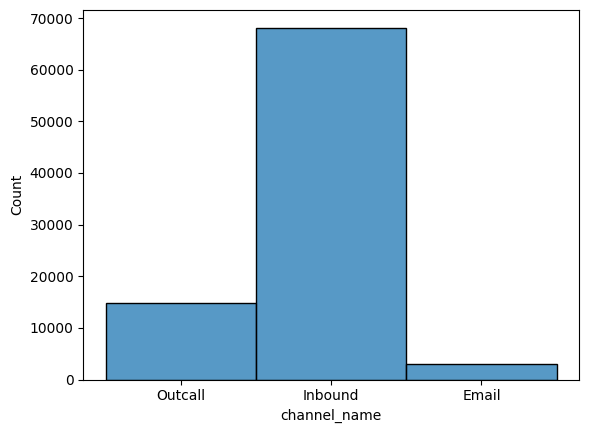

In [23]:
sns.histplot(data=CS_data, x="channel_name")

In [24]:
CS_data.channel_name.value_counts()

channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64

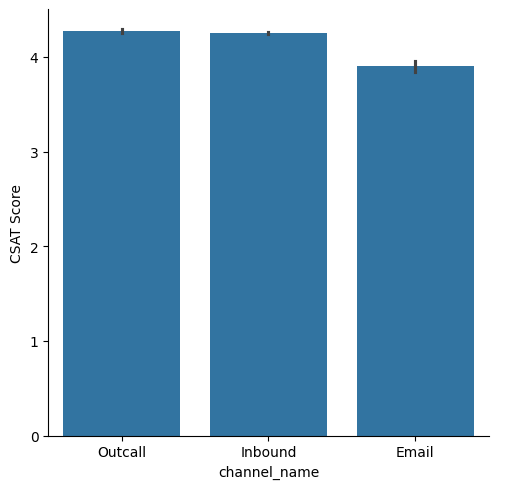

In [25]:
sns.catplot(data=CS_data, x="channel_name", y="CSAT Score", kind="bar")

Исследуйте связь каждого признака датасета Customer support с целевой переменной. Сделайте предварительный вывод о значимости признаков.


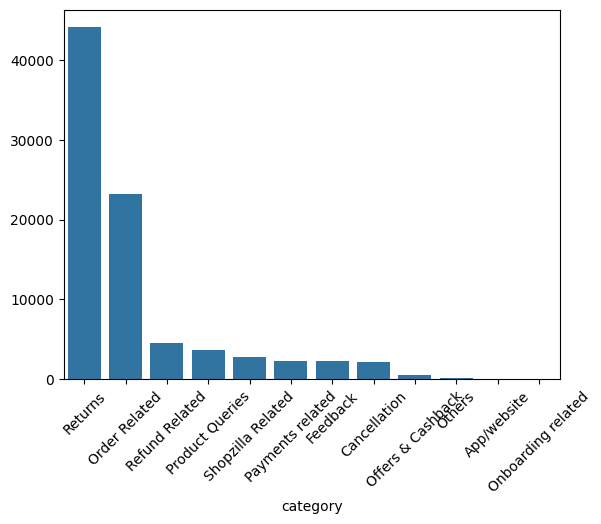

In [28]:
counts = CS_data.category.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

Где целесообразно, проведите укрупнение категорий, путем объединения разных значений в столбце.


In [29]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(int)
CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int)

In [30]:
CS_data.loc[~CS_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry",
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

Добавьте к датасету новый столбец, содержащий агрегированную информацию, которая предположительно будет полезна для моделирования целевой переменной.


In [31]:
CS_data['Agent_count'] = CS_data.groupby(["Agent_name"])["Agent_name"].transform('count')

In [ ]:
CS_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'})

In [33]:
CS_data['Sups_no_agents'] = CS_data.groupby(["Supervisor"])["Agent_name"].transform('nunique')

Заполните отсутствующие значения в датасете.


In [34]:
CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')

In [35]:
CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna('0')

На примере датасета Титаник проведите преобразование категориальных переменных разных шкал в численные.


In [36]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
T_data.Sex = LE_sex.fit_transform(T_data.Sex)

In [37]:
T_data.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(T_data[['Embarked']])

In [39]:
OH_embarked.get_feature_names_out(['Embarked'])

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype=object)

In [40]:
dummies = pd.DataFrame(OH_embarked.fit_transform(T_data[['Embarked']]),
                       columns=OH_embarked.get_feature_names_out(['Embarked']),
                       index = T_data.index)

In [41]:
T_dummies = pd.concat([T_data, dummies]).drop(["Embarked"], axis=1)

В датасете Customer support удалите лишние столбцы и преобразуйте все категориальные переменные через get_dummies()

In [43]:
CS_dropped = CS_data.drop([
    "Unique id",
    "Sub-category",
    "Customer Remarks",
    "Customer_City",
    "Agent_name",
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",

], axis=1)

In [44]:
CS_dummies = pd.get_dummies(CS_dropped)

In [47]:
CS_dropped

,channel_name,category,Product_category,connected_handling_time,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents
0,Outcall,Product Queries,unknown,0,Jennifer Nguyen,On Job Training,Morning,5,0,0,42,41
1,Outcall,Product Queries,unknown,0,Michael Lee,>90,Morning,5,0,0,32,17
2,Inbound,Order Related,unknown,0,William Kim,On Job Training,Evening,5,0,0,35,46
3,Inbound,Returns,unknown,0,John Smith,>90,Evening,5,0,0,48,28
4,Inbound,Cancellation,unknown,0,Michael Lee,0-30,Morning,5,0,0,124,29
...,...,...,...,...,...,...,...,...,...,...,...,...
85902,Inbound,Refund Related,unknown,0,William Kim,On Job Training,Morning,4,0,0,128,31
85903,Inbound,Order Related,unknown,0,Emily Chen,>90,Morning,5,1,0,75,50
85904,Inbound,Order Related,unknown,0,Olivia Tan,On Job Training,Evening,5,1,0,31,41
85905,Inbound,Feedback,unknown,0,Olivia Tan,>90,Morning,4,0,0,48,44


# 1 Постройте визуализацию распределения признаков и совместного распределения признаков и целевой переменной с помощью тепловых карт. Попробуйте использовать другие инструменты визуализации.


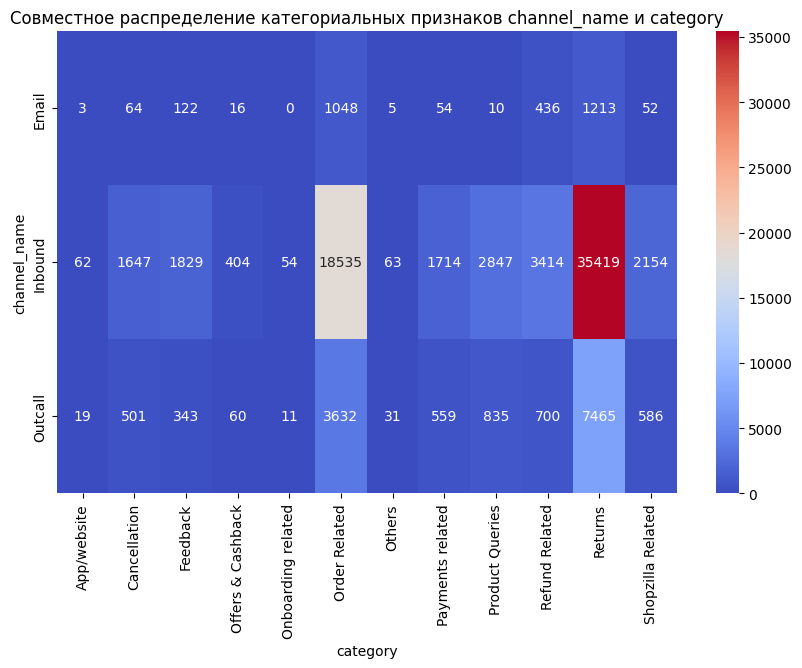

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(CS_dropped['channel_name'], CS_dropped['category']), annot=True, cmap='coolwarm', fmt='d')
plt.title('Совместное распределение категориальных признаков channel_name и category')
plt.show()

Вывод:

Входящие звонки были по поводу заказов или возвратов в большинстве случаев, это же касается почты и исходящих звонков. Кроме того, можно сказать, что по поводу заказов или возвратов люди чаще звонят, чем пишут на почту

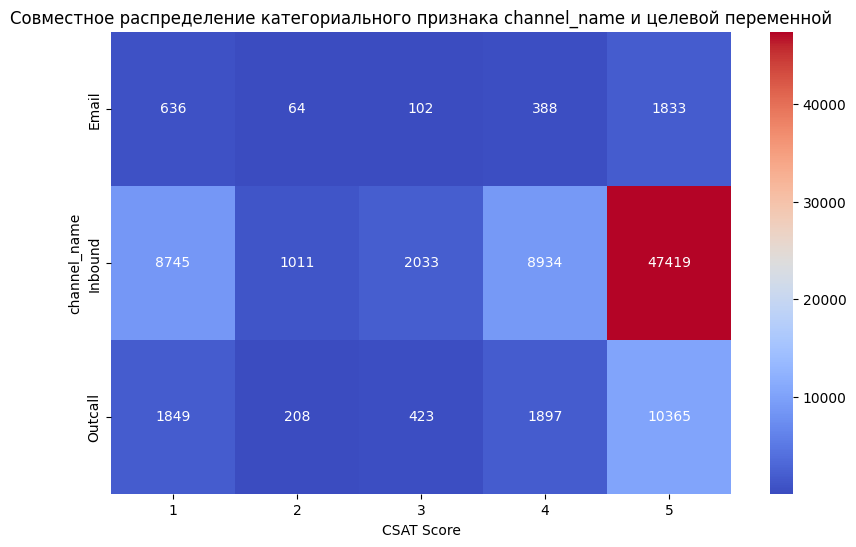

In [62]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(CS_dropped['channel_name'], CS_dropped['CSAT Score']), annot=True, cmap='coolwarm', fmt='d')
plt.title('Совместное распределение категориального признака channel_name и целевой переменной')
plt.show()

Вывод:

Большее число отзывов полажительны с баллом 5 и поступают по входящим вызовам

# 2 Постройте на получившимся датасете Customer support модель дерева решений и проанализируйте важность признаков. Сделайте вывод об адекватности наших предположений.


In [68]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Разделение данных на признаки и целевую переменную
X = CS_dummies.drop('CSAT Score', axis=1)
y = CS_dummies['CSAT Score']

# Создание модели дерева решений
model = DecisionTreeClassifier(random_state=42)

# Обучение модели
model.fit(X, y)

# Вывод важности признаков
feature_importances = model.feature_importances_
feature_names = X.columns

# Сортировка признаков по важности
sorted_importances = sorted(zip(feature_importances, feature_names), reverse=True)

# Вывод важности признаков
i = 0
print("Важность признаков:")
for importance, feature in sorted_importances:
    print(f"{feature}: {importance:.4f}")
    i +=1
    if i == 10:
      break


Важность признаков:
Agent_count: 0.2991
Sups_no_agents: 0.1637
Is_order: 0.0657
channel_name_Inbound: 0.0398
channel_name_Outcall: 0.0370
category_Order Related: 0.0195
category_Refund Related: 0.0192
Agent Shift_Morning: 0.0187
Agent Shift_Evening: 0.0173
channel_name_Email: 0.0165


Вывод: наши предположения были верны

# 3 Разбейте датасет на тестовую и обучающую выборки


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(CS_dummies.drop('CSAT Score', axis=1), CS_dummies['CSAT Score'], test_size=0.33, random_state=42)

In [71]:
X_train.shape[0], X_test.shape[0]

(57557, 28350)

# 4 Проведите полный анализ на датасете Титаник, включая все необходимые визуализации и выводы.


Подробный анализ по данному датасету проведён в следующей ЛР 5.5